<a href="https://colab.research.google.com/github/tiaratatyanadewi/Quantium-Virtual-Internship/blob/main/Task_2_Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 2: Experimentation and uplift testing

In [ ]:
!gdown 1unoyHoljV4lu9HLIYs7htzJswhNDSLcz

Downloading...
From: https://drive.google.com/uc?id=1unoyHoljV4lu9HLIYs7htzJswhNDSLcz
To: /content/QVI_data.csv
100% 29.0M/29.0M [00:00<00:00, 120MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
# Extract year and month from the DATE column
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

# Group by STORE_NBR and YEAR_MONTH to calculate metrics
monthly_sales = df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg(
    total_sales_revenue=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', 'nunique'),
    # Calculate average transactions within each group
    average_transactions_per_customer=('TXN_ID', 'count')
).reset_index()

# Calculate average transactions per customer after grouping
monthly_sales['average_transactions_per_customer'] = monthly_sales['average_transactions_per_customer'] / monthly_sales['total_customers']

In [ ]:
monthly_sales.head()

,STORE_NBR,YEAR_MONTH,total_sales_revenue,total_customers,average_transactions_per_customer
0,1,2018-07,206.9,49,1.061224
1,1,2018-08,176.1,42,1.023810
2,1,2018-09,278.8,59,1.050847
3,1,2018-10,188.1,44,1.022727
4,1,2018-11,192.6,46,1.021739


In [ ]:
from scipy.stats import pearsonr

def compare_stores(trial_store, control_store, data):
    trial_data = data[data['STORE_NBR'] == trial_store]
    control_data = data[data['STORE_NBR'] == control_store]

    # Ensure both stores have data for the same months
    common_months = trial_data['YEAR_MONTH'].isin(control_data['YEAR_MONTH'])
    trial_data = trial_data[common_months]
    control_data = control_data[control_data['YEAR_MONTH'].isin(trial_data['YEAR_MONTH'])]

    # Calculate Pearson correlation for total sales revenue, total customers, and average transactions
    correlation_sales = pearsonr(trial_data['total_sales_revenue'], control_data['total_sales_revenue'])[0]
    correlation_customers = pearsonr(trial_data['total_customers'], control_data['total_customers'])[0]
    correlation_transactions = pearsonr(trial_data['average_transactions_per_customer'], control_data['average_transactions_per_customer'])[0]

    # Alternatively, you can use magnitude distance
    def magnitude_distance(x, y):
        min_dist = abs(min(x.max(), y.max()) - min(x.min(), y.min()))
        max_dist = abs(max(x.max(), y.max()) - min(x.min(), y.min()))
        observed_dist = abs(x.mean() - y.mean())
        return 1 - (observed_dist - min_dist) / (max_dist - min_dist)

    magnitude_dist_sales = magnitude_distance(trial_data['total_sales_revenue'], control_data['total_sales_revenue'])
    magnitude_dist_customers = magnitude_distance(trial_data['total_customers'], control_data['total_customers'])
    magnitude_dist_transactions = magnitude_distance(trial_data['average_transactions_per_customer'], control_data['average_transactions_per_customer'])

    return {
        'pearson_correlation_sales': correlation_sales,
        'pearson_correlation_customers': correlation_customers,
        'pearson_correlation_transactions': correlation_transactions,
        'magnitude_distance_sales': magnitude_dist_sales,
        'magnitude_distance_customers': magnitude_dist_customers,
        'magnitude_distance_transactions': magnitude_dist_transactions
    }


In [ ]:
trial_stores = [77, 86, 88]

# Assume the control store
control_stores = [50, 51, 52]

results = {}
for trial in trial_stores:
    for control in control_stores:
        result = compare_stores(trial, control, monthly_sales)
        results[(trial, control)] = result

# Print results
for pair, metrics in results.items():
    print(f"Trial Store {pair[0]} vs Control Store {pair[1]}:")
    print(f"  Pearson Correlation Sales: {metrics['pearson_correlation_sales']:.2f}")
    print(f"  Pearson Correlation Customers: {metrics['pearson_correlation_customers']:.2f}")
    print(f"  Pearson Correlation Transactions: {metrics['pearson_correlation_transactions']:.2f}")
    print(f"  Magnitude Distance Sales: {metrics['magnitude_distance_sales']:.2f}")
    print(f"  Magnitude Distance Customers: {metrics['magnitude_distance_customers']:.2f}")
    print(f"  Magnitude Distance Transactions: {metrics['magnitude_distance_transactions']:.2f}")


Trial Store 77 vs Control Store 50:
  Pearson Correlation Sales: 0.30
  Pearson Correlation Customers: 0.10
  Pearson Correlation Transactions: 0.19
  Magnitude Distance Sales: 5.46
  Magnitude Distance Customers: 3.47
  Magnitude Distance Transactions: 5.06
Trial Store 77 vs Control Store 51:
  Pearson Correlation Sales: 0.05
  Pearson Correlation Customers: 0.36
  Pearson Correlation Transactions: 0.07
  Magnitude Distance Sales: 1.09
  Magnitude Distance Customers: 4.20
  Magnitude Distance Transactions: 9.80
Trial Store 77 vs Control Store 52:
  Pearson Correlation Sales: 0.13
  Pearson Correlation Customers: 0.05
  Pearson Correlation Transactions: nan
  Magnitude Distance Sales: 0.25
  Magnitude Distance Customers: 0.27
  Magnitude Distance Transactions: 0.57
Trial Store 86 vs Control Store 50:
  Pearson Correlation Sales: -0.41
  Pearson Correlation Customers: -0.41
  Pearson Correlation Transactions: -0.34
  Magnitude Distance Sales: 0.34
  Magnitude Distance Customers: 0.52
  

<ipython-input-16-8f80d38a4cef>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_transactions = pearsonr(trial_data['average_transactions_per_customer'], control_data['average_transactions_per_customer'])[0]


In [ ]:
from scipy.stats import ttest_ind

def test_significance(trial_store, control_store, data):
    trial_sales = data[data['STORE_NBR'] == trial_store]['total_sales_revenue']
    control_sales = data[data['STORE_NBR'] == control_store]['total_sales_revenue']

    t_stat, p_val = ttest_ind(trial_sales, control_sales, equal_var=False)

    return t_stat, p_val

# Example usage
for trial in trial_stores:
    for control in control_stores:
        t_stat, p_val = test_significance(trial, control, monthly_sales)
        print(f"Trial Store {trial} vs Control Store {control}:")
        print(f"  T-Statistic: {t_stat:.2f}")
        print(f"  P-Value: {p_val:.4f}")


Trial Store 77 vs Control Store 50:
  T-Statistic: 0.15
  P-Value: 0.8808
Trial Store 77 vs Control Store 51:
  T-Statistic: 6.68
  P-Value: 0.0000
Trial Store 77 vs Control Store 52:
  T-Statistic: 22.28
  P-Value: 0.0000
Trial Store 86 vs Control Store 50:
  T-Statistic: 26.82
  P-Value: 0.0000
Trial Store 86 vs Control Store 51:
  T-Statistic: 33.76
  P-Value: 0.0000
Trial Store 86 vs Control Store 52:
  T-Statistic: 43.48
  P-Value: 0.0000
Trial Store 88 vs Control Store 50:
  T-Statistic: 49.54
  P-Value: 0.0000
Trial Store 88 vs Control Store 51:
  T-Statistic: 60.08
  P-Value: 0.0000
Trial Store 88 vs Control Store 52:
  T-Statistic: 73.80
  P-Value: 0.0000


<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

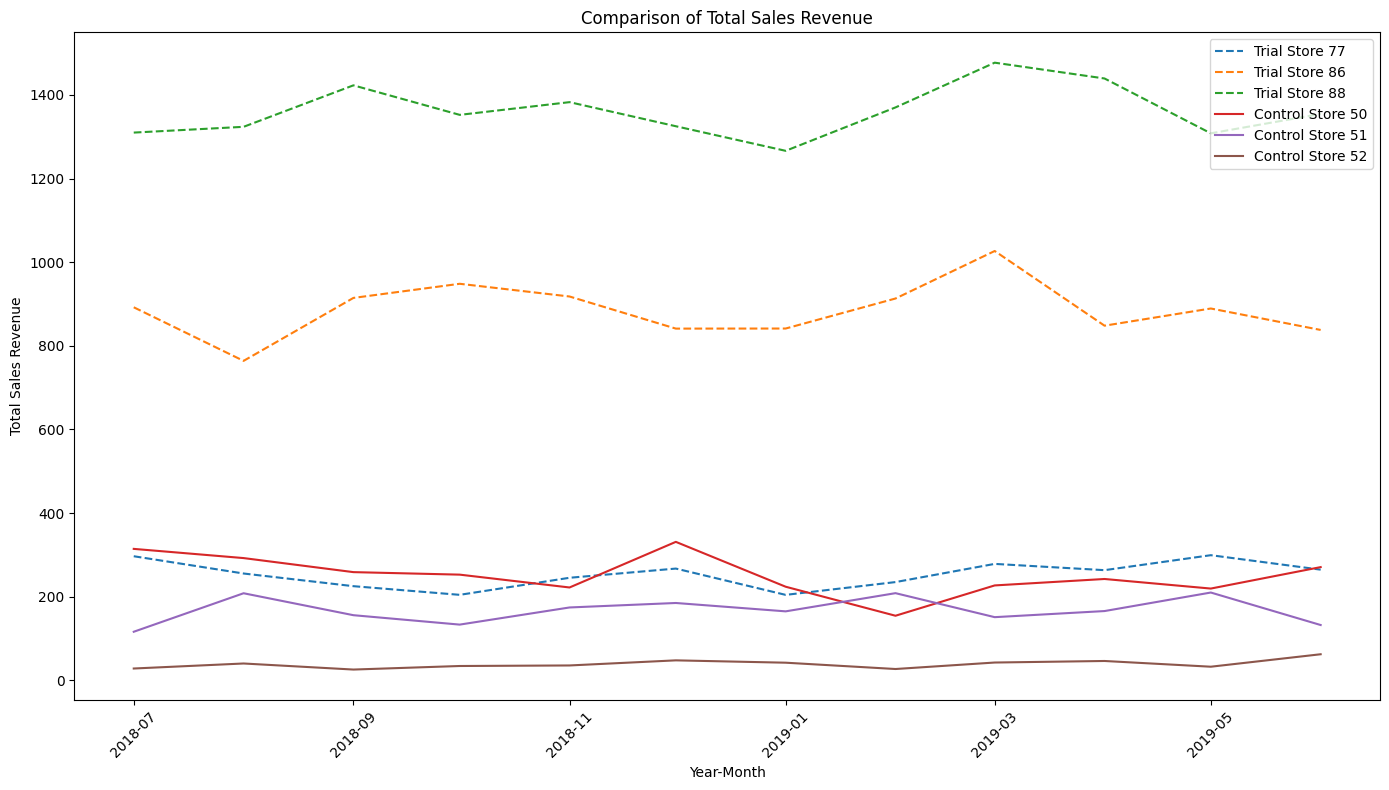

<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

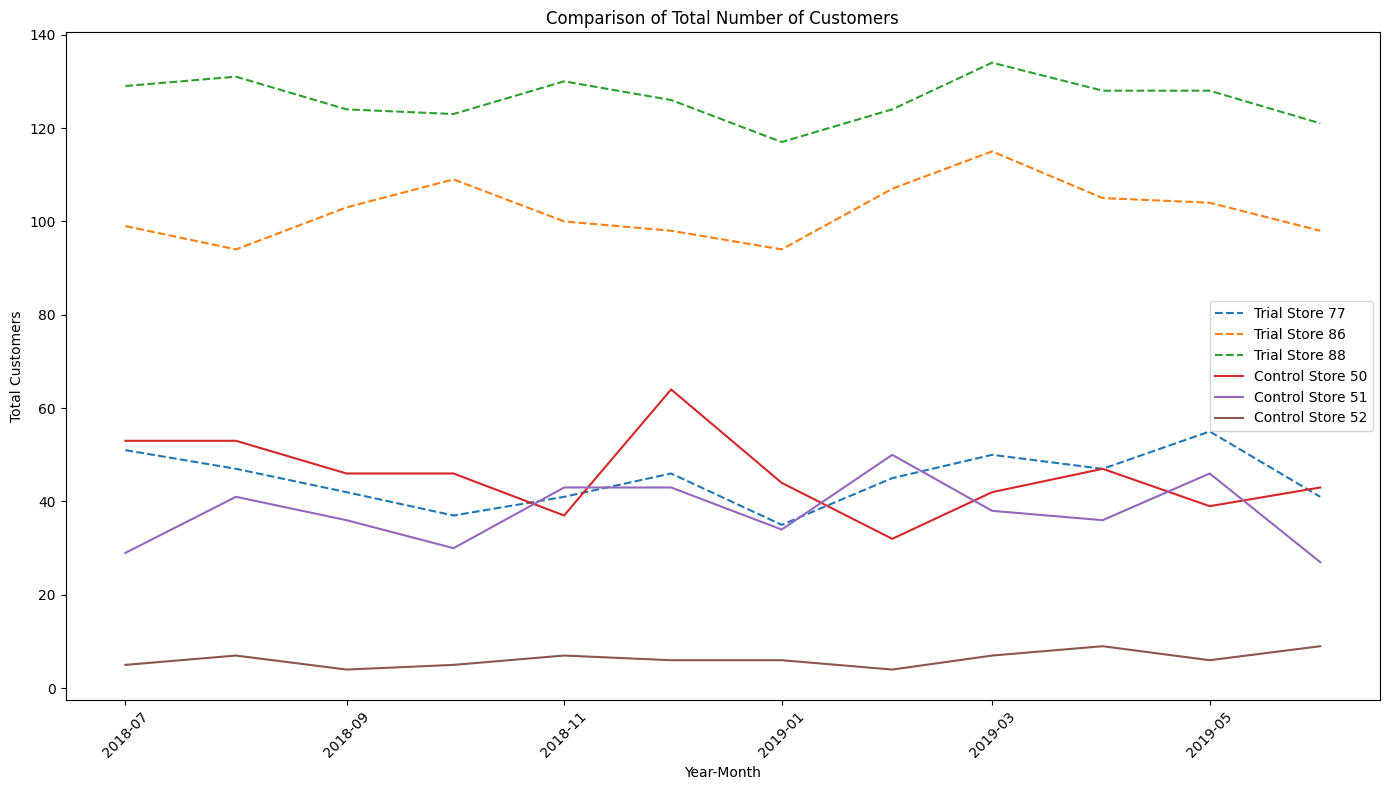

<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
<ipython-input-28-170f333c35d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

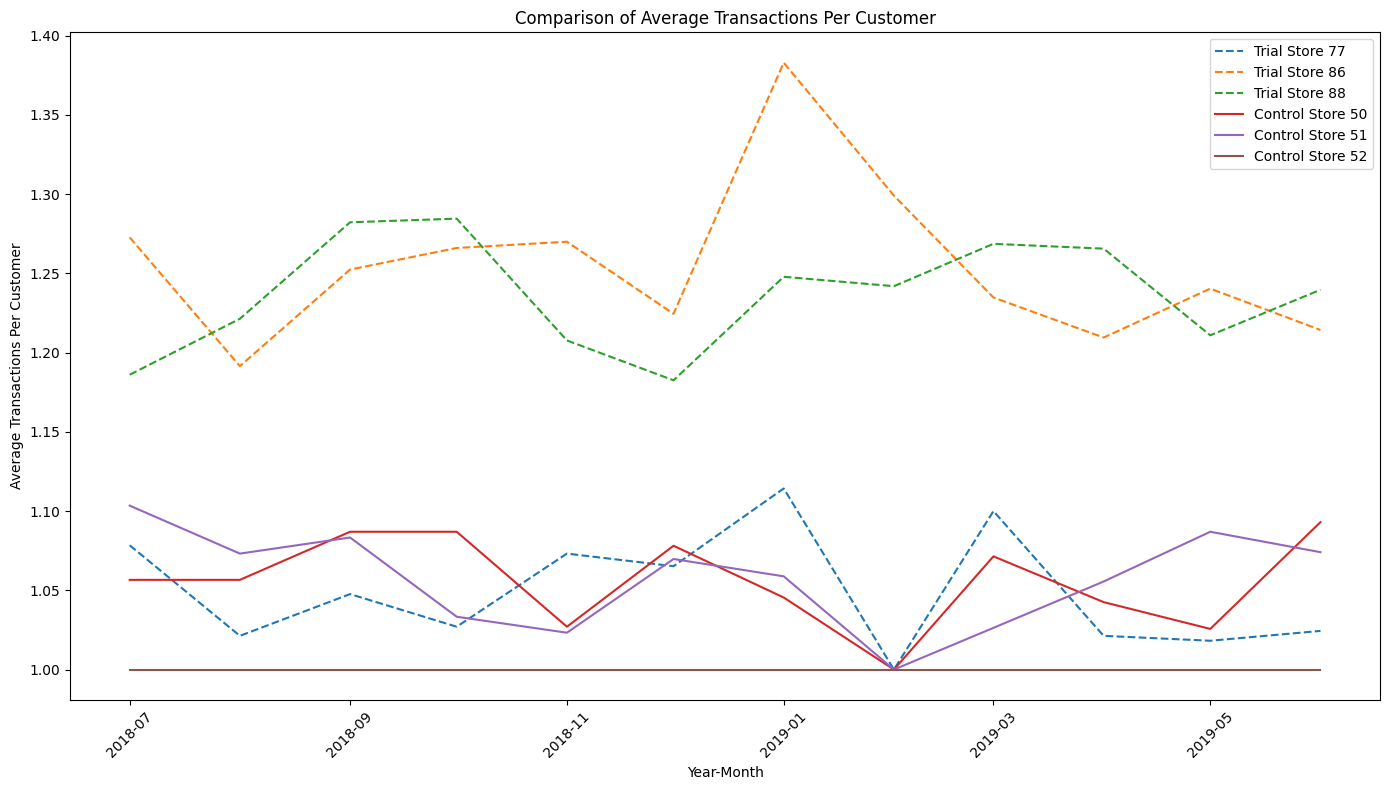

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparison(data, trial_stores, control_stores, metric, title):
    plt.figure(figsize=(14, 8))

    # Plot trial stores
    for store in trial_stores:
        store_data = data[data['STORE_NBR'] == store]
        # Convert 'YEAR_MONTH' to datetime objects if they are not already
        if not isinstance(store_data['YEAR_MONTH'].dtype, pd.DatetimeTZDtype):
            # Use to_timestamp to convert PeriodDtype to datetime
            store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
        sns.lineplot(x='YEAR_MONTH', y=metric, data=store_data, label=f'Trial Store {store}', linestyle='--')

    # Plot control stores
    for store in control_stores:
        store_data = data[data['STORE_NBR'] == store]
        # Convert 'YEAR_MONTH' to datetime objects if they are not already
        if not isinstance(store_data['YEAR_MONTH'].dtype, pd.DatetimeTZDtype):
            # Use to_timestamp to convert PeriodDtype to datetime
            store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()
        sns.lineplot(x='YEAR_MONTH', y=metric, data=store_data, label=f'Control Store {store}')

    plt.title(title)
    plt.xlabel('Year-Month')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_comparison(monthly_sales, [77, 86, 88], [50, 51, 52], 'total_sales_revenue', 'Comparison of Total Sales Revenue')
plot_comparison(monthly_sales, [77, 86, 88], [50, 51, 52], 'total_customers', 'Comparison of Total Number of Customers')
plot_comparison(monthly_sales, [77, 86, 88], [50, 51, 52], 'average_transactions_per_customer', 'Comparison of Average Transactions Per Customer')

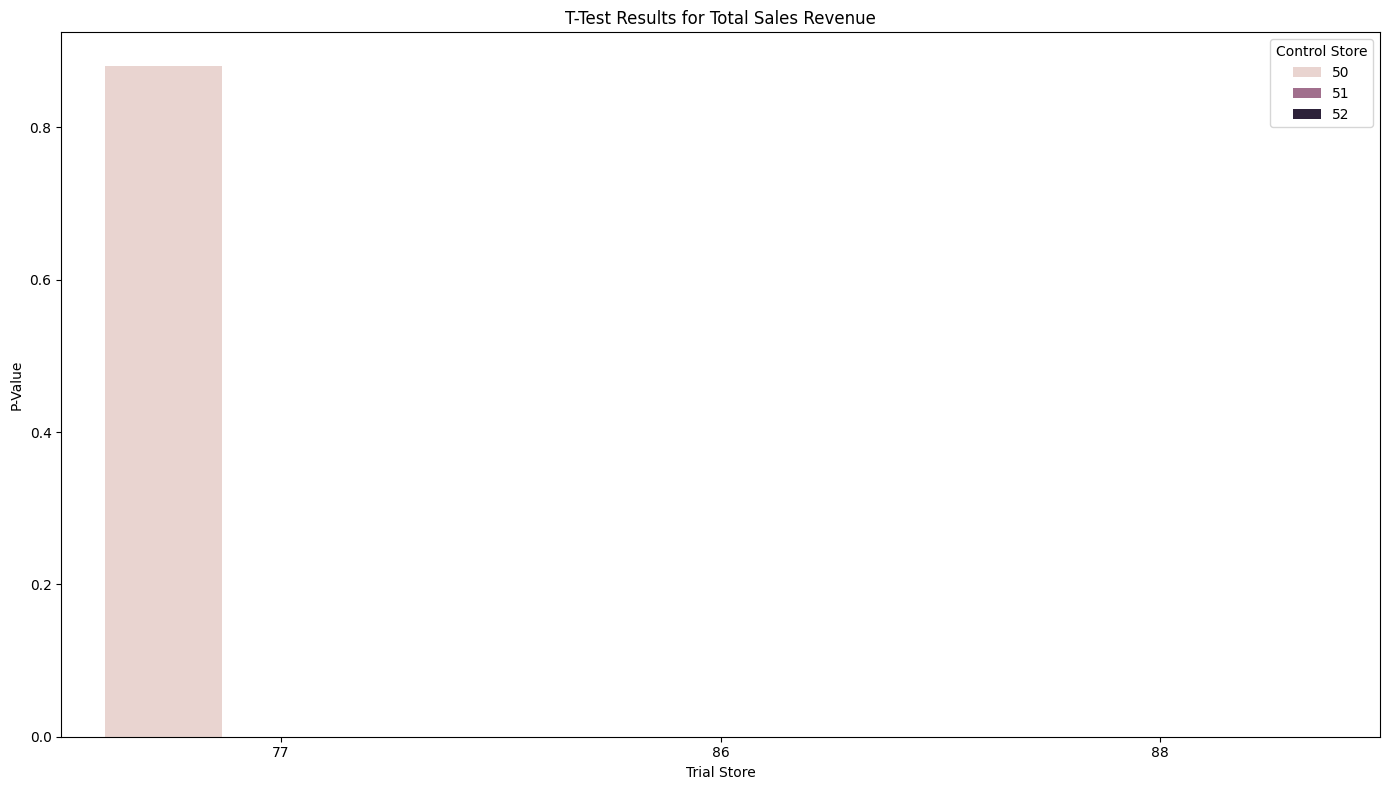

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the results
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['Trial_Store', 'Control_Store', 'Pearson_Correlation_Sales', 'Pearson_Correlation_Customers',
                      'Pearson_Correlation_Transactions', 'Magnitude_Distance_Sales', 'Magnitude_Distance_Customers',
                      'Magnitude_Distance_Transactions']

# Calculate p-values and add them to the DataFrame
p_values = []
for trial in results_df['Trial_Store']:
    for control in results_df['Control_Store']:
        _, p_val = test_significance(trial, control, monthly_sales) # Assuming 'monthly_sales' is available
        p_values.append({'Trial_Store': trial, 'Control_Store': control, 'p_val': p_val})

p_values_df = pd.DataFrame(p_values)
results_df = results_df.merge(p_values_df, on=['Trial_Store', 'Control_Store'])

# Plot t-test results
def plot_t_test_results(results_df):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trial_Store', y='p_val', hue='Control_Store', data=results_df) # Now 'p_val' is in the DataFrame
    plt.title('T-Test Results for Total Sales Revenue')
    plt.xlabel('Trial Store')
    plt.ylabel('P-Value')
    plt.legend(title='Control Store')
    plt.tight_layout()
    plt.show()


plot_t_test_results(results_df)

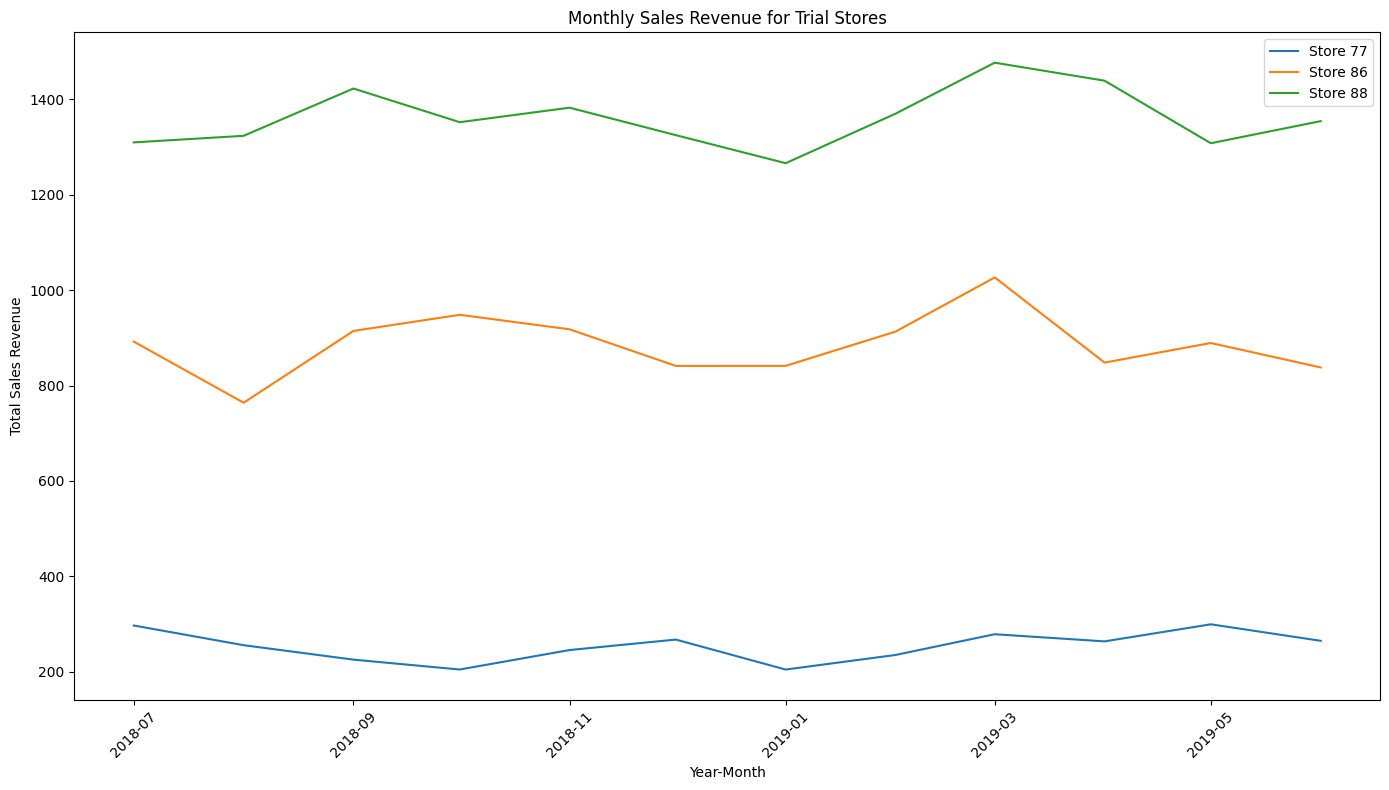

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_monthly_sales(data, store_numbers, title):
    plt.figure(figsize=(14, 8))
    for store in store_numbers:
        store_data = data[data['STORE_NBR'] == store].copy() # Create a copy to avoid modifying the original
        # Convert 'YEAR_MONTH' to datetime objects if they are not already
        if not isinstance(store_data['YEAR_MONTH'].dtype, pd.DatetimeTZDtype):
            store_data['YEAR_MONTH'] = pd.to_datetime(store_data['YEAR_MONTH'].dt.to_timestamp())
        sns.lineplot(x='YEAR_MONTH', y='total_sales_revenue', data=store_data, label=f'Store {store}')

    plt.title(title)
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales Revenue')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_monthly_sales(monthly_sales, [77, 86, 88], 'Monthly Sales Revenue for Trial Stores')

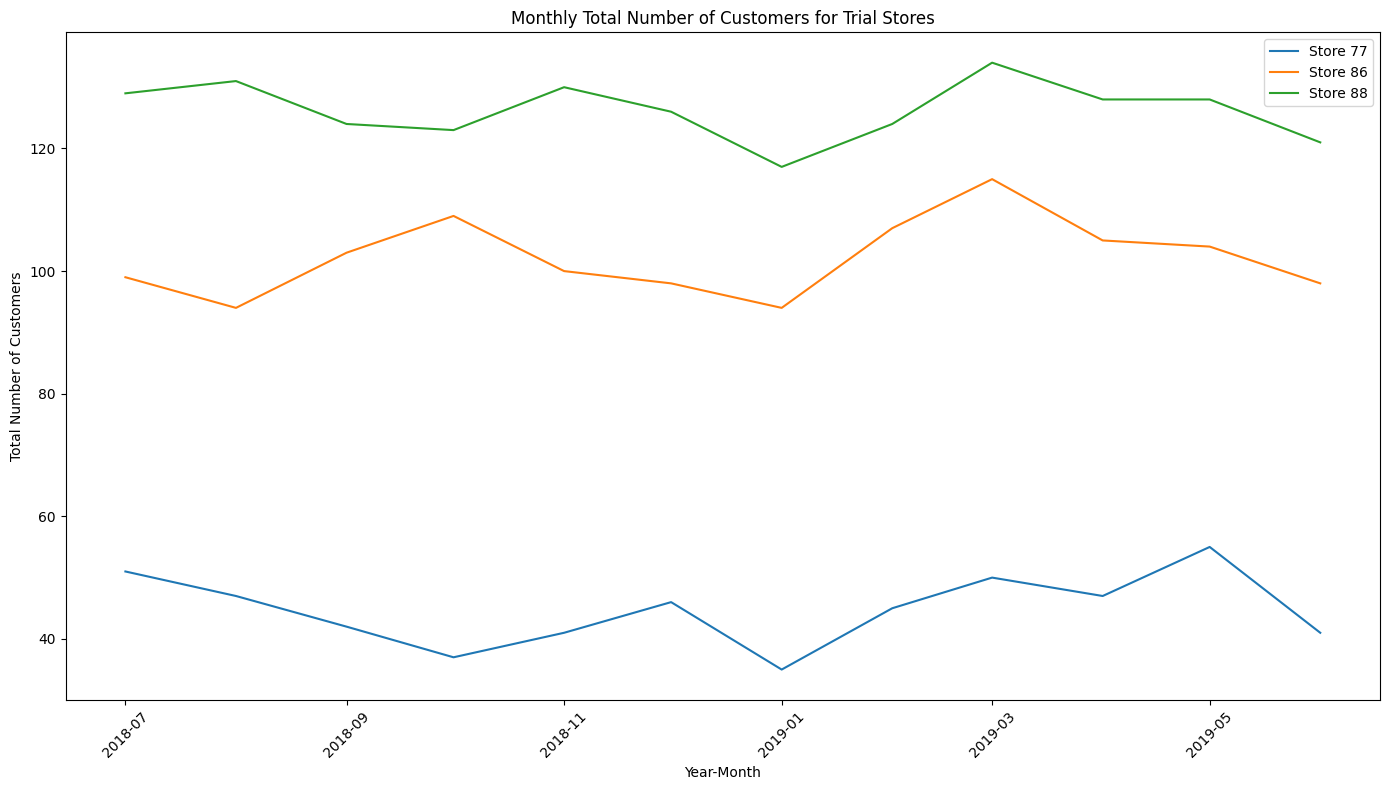

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_total_customers(data, store_numbers, title):
    plt.figure(figsize=(14, 8))
    for store in store_numbers:
        store_data = data[data['STORE_NBR'] == store].copy()
        # Ensure 'YEAR_MONTH' is in datetime format
        if not isinstance(store_data['YEAR_MONTH'].dtype, pd.DatetimeTZDtype):
            store_data['YEAR_MONTH'] = store_data['YEAR_MONTH'].dt.to_timestamp()  # Use .dt.to_timestamp() for PeriodDtype
        sns.lineplot(x='YEAR_MONTH', y='total_customers', data=store_data, label=f'Store {store}')

    plt.title(title)
    plt.xlabel('Year-Month')
    plt.ylabel('Total Number of Customers')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_total_customers(monthly_sales, [77, 86, 88], 'Monthly Total Number of Customers for Trial Stores')

##Insights:
1. Store 77:

* Compared to Store 50: The performance was similar, with no significant change in sales during the trial period.
* Compared to Stores 51 & 52: Sales increased significantly during the trial. This growth was likely driven by more customers and more purchases per customer.

2. Store 86:

* Across all comparisons, sales and transactions went down during the trial period. The store experienced fewer customers and less frequent purchases.

3. Store 88:

* Sales increased significantly, but the number of transactions and customer behavior fluctuated. This indicates some positive changes but suggests room for improvement in consistency.

##Strategies:
1. Encourage More Purchases:

* For stores with more customers but fewer transactions (like Store 88), consider offering discounts, bundles, and loyalty rewards to encourage them to buy more often.

2. Monitor and Adjust:

* Continuously track trial store performance to identify what’s working and adjust strategies. For instance, if a store is seeing more foot traffic but fewer sales, focus on in-store promotions.

3. Focus on Customer Retention:

* Stores like Store 77 could benefit from focusing on retaining new customers with personalized offers and exclusive deals.

These simple strategies could help drive consistent growth across all trial stores.